In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the images to range between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Concatenate all the images (60,000 images total) and labels
all_images = np.concatenate((train_images, test_images), axis=0)
all_labels = np.concatenate((train_labels, test_labels), axis=0)

# Shuffle the entire dataset of 60,000 images
shuffle_indices = np.random.permutation(len(all_images))
shuffled_images = all_images[shuffle_indices]
shuffled_labels = all_labels[shuffle_indices]

# Split into 50,000 images for training and 10,000 images for testing
train_images = shuffled_images[:50000]
train_labels = shuffled_labels[:50000]
test_images = shuffled_images[50000:]
test_labels = shuffled_labels[50000:]

# Randomly select 10,000 images from the training set to add to the test set
num_train_in_test = 10000
train_indices_for_test = np.random.permutation(len(train_images))[:num_train_in_test]

# Extract the selected training images and labels for the test set
train_images_for_test = train_images[train_indices_for_test]
train_labels_for_test = train_labels[train_indices_for_test]

# Concatenate the selected training images with the test set
combined_test_images = np.concatenate((test_images, train_images_for_test), axis=0)
combined_test_labels = np.concatenate((test_labels, train_labels_for_test), axis=0)

# Create a membership flag: 0 means the image was not in the training set, 1 means it was part of the training set
membership_flag = np.concatenate((np.zeros(len(test_images)), np.ones(num_train_in_test)))

# Ensure labels are 1D (flatten to (None,))
train_labels = train_labels.reshape(-1)  # Reshape to remove any extra dimensions
combined_test_labels = combined_test_labels.reshape(-1)

# Convert labels to categorical (one-hot encoding)
train_labels = to_categorical(train_labels, 10)  # Shape will become (50000, 10)
combined_test_labels = to_categorical(combined_test_labels, 10)  # Shape will become (15000, 10)

# Define the CNN model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.LeakyReLU(alpha=0.3))  # LeakyReLU activation

#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.LeakyReLU(alpha=0.3))  # LeakyReLU activation

#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(128, (3, 3), input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.LeakyReLU(alpha=0.3))  # LeakyReLU activation

#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Fully connected layer with 256 units
model.add(layers.Dense(256))
model.add(layers.LeakyReLU(alpha=0.3))

#model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dropout(0.4))

# Fully connected layer with 128 units
model.add(layers.Dense(128))
model.add(layers.LeakyReLU(alpha=0.3))

#model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))

# Fully connected layer with 64 units
model.add(layers.Dense(64))
model.add(layers.LeakyReLU(alpha=0.3))

#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))

# Output layer with 10 units (one for each class) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_images, train_labels,
                    epochs=100,
                    batch_size=128,
                    validation_data=(combined_test_images, combined_test_labels),
                    callbacks=[early_stopping])

# Evaluate the model on the combined test set
test_loss, test_acc = model.evaluate(combined_test_images, combined_test_labels)
print(f'Test accuracy: {test_acc:.4f}')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 759s 4us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.2649 - loss: 1.9664 - val_accuracy: 0.5406 - val_loss: 1.2847
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5129 - loss: 1.3550 - val_accuracy: 0.6205 - val_loss: 1.0623
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6001 - loss: 1.1287 - val_accuracy: 0.6589 - val_loss: 0.9563
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6540 - loss: 1.0023 - val_accuracy: 0.6847 - val_loss: 0.8937
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6880 - loss: 0.9091 - val_accuracy: 0.7218 - val_loss: 0.8014
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7106 - loss: 0.8337 - val_accuracy: 0.7186 - val_loss: 0.8115
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7324 - loss: 0.7784 - val_accuracy: 0.7560 - val_loss: 0.7101
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7531 - loss: 0.7282 - val_a

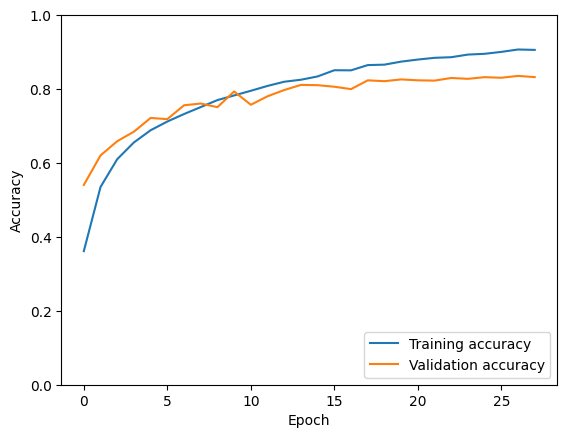

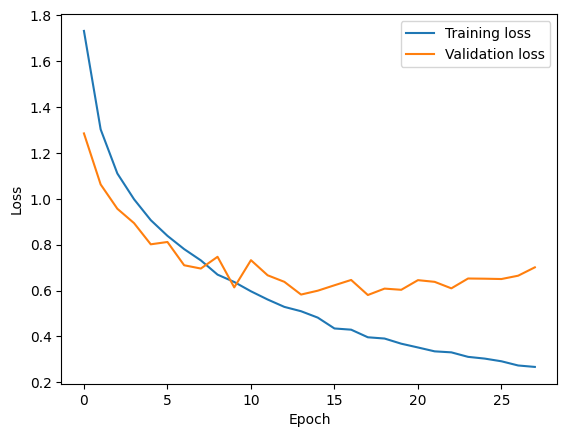

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Predict probabilities for the combined test set
probabilities = model.predict(combined_test_images)

# Get the predicted class and the most confident percentage for each input
predicted_classes = np.argmax(probabilities, axis=1)
max_confidences = np.max(probabilities, axis=1) * 100  # Convert to percentage

# Print the average confidence to get a sense of the results
print(f"Average confidence: {np.mean(max_confidences):.2f}%")


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Average confidence: 84.11%


In [ ]:
# Set a threshold for confidence (e.g., 90%)
confidence_threshold = 95

# Find data points above and below the threshold
above_threshold = max_confidences >= confidence_threshold
below_threshold = max_confidences < confidence_threshold

# Split based on membership flag
above_threshold_training = np.sum(above_threshold & (membership_flag == 1))
above_threshold_non_training = np.sum(above_threshold & (membership_flag == 0))

below_threshold_training = np.sum(below_threshold & (membership_flag == 1))
below_threshold_non_training = np.sum(below_threshold & (membership_flag == 0))

# Print out the results
print(f"Training images above {confidence_threshold}%: {above_threshold_training}")
print(f"Non-training images above {confidence_threshold}%: {above_threshold_non_training}")
print(f"Training images below {confidence_threshold}%: {below_threshold_training}")
print(f"Non-training images below {confidence_threshold}%: {below_threshold_non_training}")


Training images above 95%: 5185
Non-training images above 95%: 3938
Training images below 95%: 4815
Non-training images below 95%: 6062


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


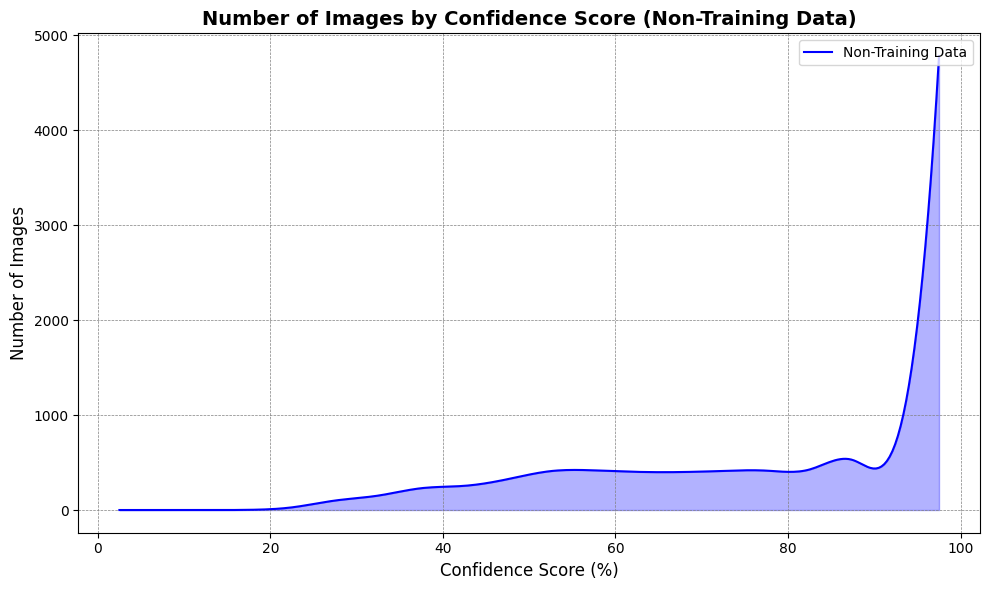

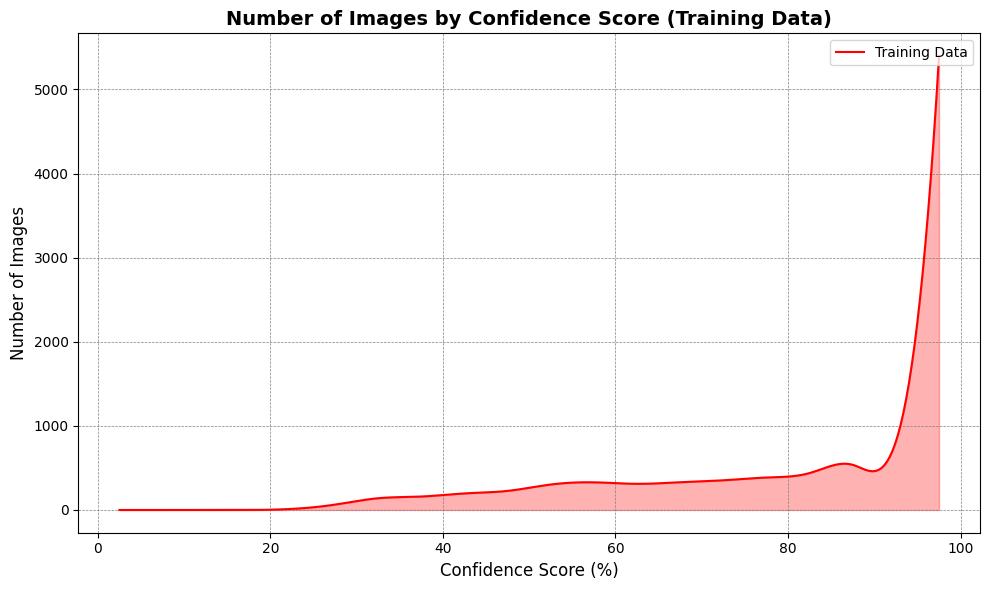

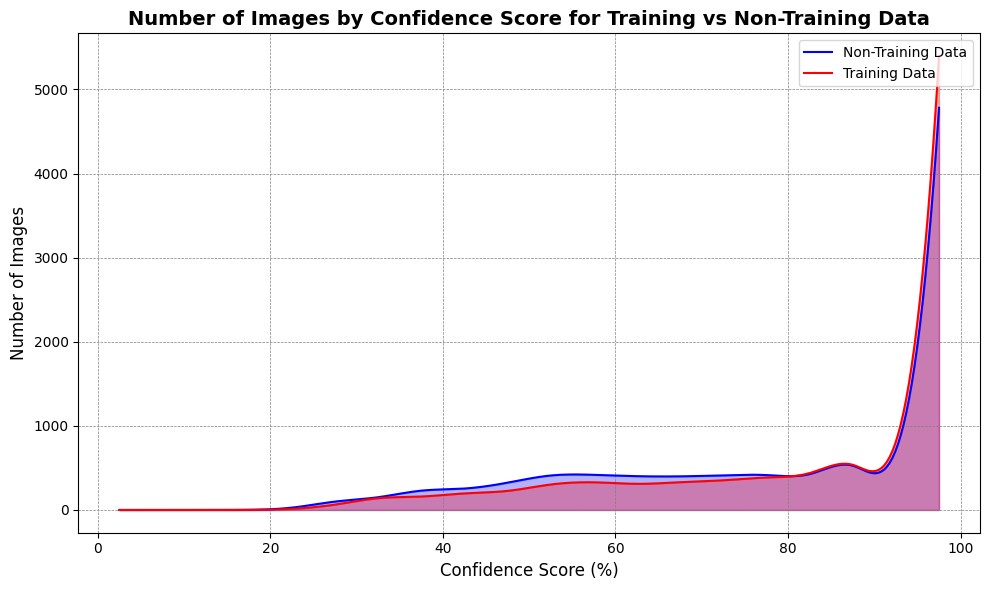

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Predict probabilities for each class in the combined test set
probabilities = model.predict(combined_test_images)

# Get the highest confidence score for each image
max_confidences = np.max(probabilities, axis=1) * 100  # Convert to percentage

# Separate confidence scores based on membership flag
training_confidences = max_confidences[membership_flag == 1]
non_training_confidences = max_confidences[membership_flag == 0]

# Define confidence bins for the x-axis
confidence_bins = np.arange(0, 101, 5)  # Bins from 0 to 100% in steps of 5%

# Calculate histogram (count) of confidence scores for each group
training_counts, _ = np.histogram(training_confidences, bins=confidence_bins)
non_training_counts, _ = np.histogram(non_training_confidences, bins=confidence_bins)

# Smooth the lines using spline interpolation
x_vals = confidence_bins[:-1] + 2.5  # Center points within each bin
x_smooth = np.linspace(x_vals.min(), x_vals.max(), 300)  # More points for smoothness

# Spline for non-training data
non_training_spline = make_interp_spline(x_vals, non_training_counts, k=3)
non_training_smooth = non_training_spline(x_smooth)

# Spline for training data
training_spline = make_interp_spline(x_vals, training_counts, k=3)
training_smooth = training_spline(x_smooth)

# Plot 1: Non-Training Data Only
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, non_training_smooth, color='blue', label='Non-Training Data')
plt.fill_between(x_smooth, non_training_smooth, color='blue', alpha=0.3)
plt.xlabel('Confidence Score (%)', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images by Confidence Score (Non-Training Data)', fontsize=14, weight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

# Plot 2: Training Data Only
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, training_smooth, color='red', label='Training Data')
plt.fill_between(x_smooth, training_smooth, color='red', alpha=0.3)
plt.xlabel('Confidence Score (%)', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images by Confidence Score (Training Data)', fontsize=14, weight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

# Plot 3: Combined Graph
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, non_training_smooth, color='blue', label='Non-Training Data')
plt.fill_between(x_smooth, non_training_smooth, color='blue', alpha=0.3)
plt.plot(x_smooth, training_smooth, color='red', label='Training Data')
plt.fill_between(x_smooth, training_smooth, color='red', alpha=0.3)
plt.xlabel('Confidence Score (%)', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images by Confidence Score for Training vs Non-Training Data', fontsize=14, weight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()


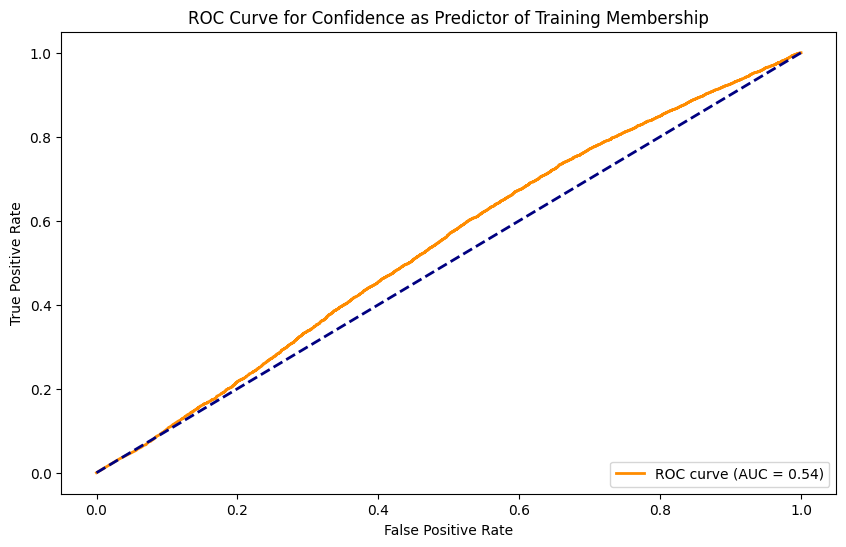

Threshold closest to 99% confidence: 99.00
True Positive Rate at this threshold: 0.40
False Positive Rate at this threshold: 0.35


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Use max_confidences as the predictor (already extracted from probabilities)
# And use membership_flag (1 for training, 0 for non-training) as the true labels

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(membership_flag, max_confidences)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Confidence as Predictor of Training Membership')
plt.legend(loc="lower right")
plt.show()

# Print information on threshold closest to 99% confidence
closest_index = (np.abs(thresholds - 99)).argmin()  # Adjusted if max_confidences are in percentage
print(f"Threshold closest to 99% confidence: {thresholds[closest_index]:.2f}")
print(f"True Positive Rate at this threshold: {tpr[closest_index]:.2f}")
print(f"False Positive Rate at this threshold: {fpr[closest_index]:.2f}")


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


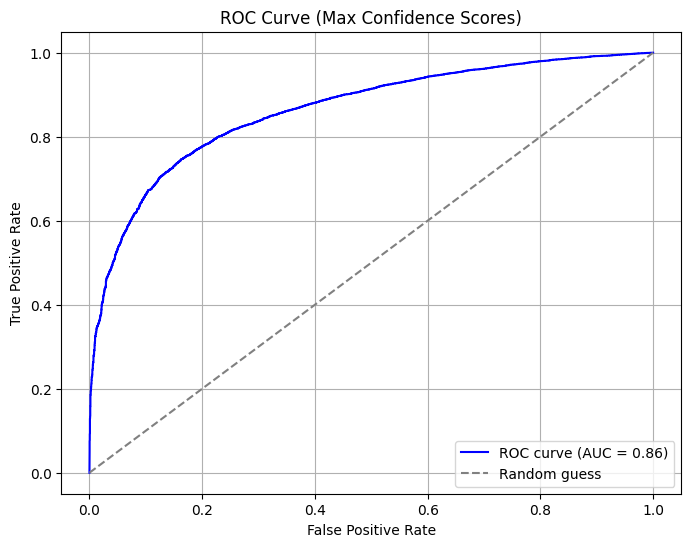

In [ ]:
#vignesh roc

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_probs = model.predict(combined_test_images)

# Get the true labels as integers
y_true = np.argmax(combined_test_labels, axis=1)

# Compute the max confidence score for each data point
max_confidence_scores = np.max(y_pred_probs, axis=1)

# Create a binary indicator: True if the model's prediction is correct, False otherwise
correct_predictions = (np.argmax(y_pred_probs, axis=1) == y_true).astype(int)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(correct_predictions, max_confidence_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random guess")
plt.title("ROC Curve (Max Confidence Scores)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step


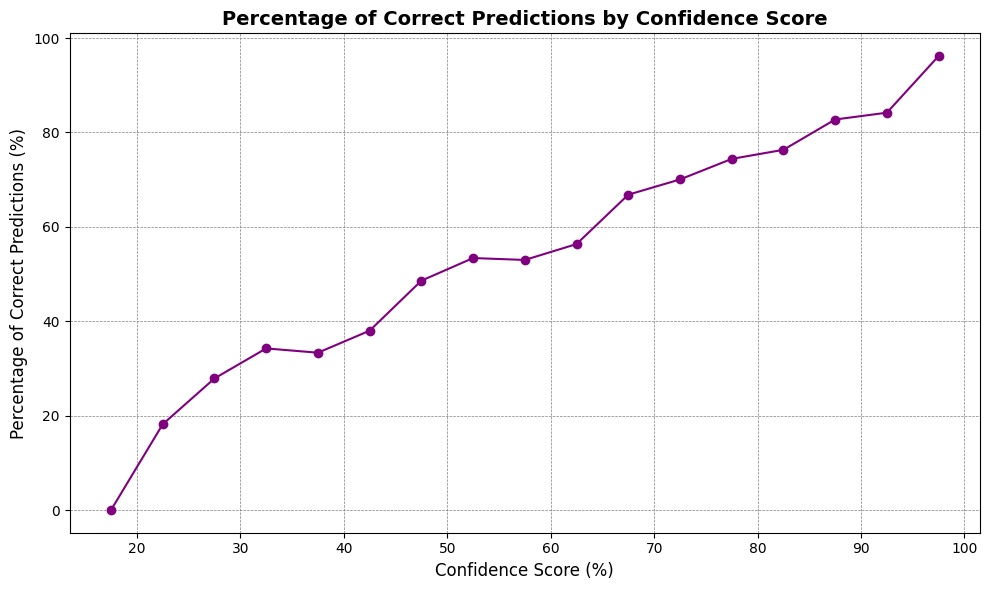

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get model predictions and calculate confidence scores
probabilities = model.predict(combined_test_images)
predicted_classes = np.argmax(probabilities, axis=1)
true_classes = np.argmax(combined_test_labels, axis=1)
max_confidences = np.max(probabilities, axis=1) * 100  # Convert to percentage

# Define confidence bins (e.g., from 0% to 100% in steps of 5%)
confidence_bins = np.arange(0, 101, 5)

# Calculate accuracy (percentage of correct predictions) for each confidence bin
accuracy_per_bin = []
for i in range(len(confidence_bins) - 1):
    # Get indices of predictions within the current confidence bin
    bin_indices = (max_confidences >= confidence_bins[i]) & (max_confidences < confidence_bins[i + 1])
    if np.sum(bin_indices) > 0:
        # Calculate the percentage of correct predictions in this bin
        correct_predictions = (predicted_classes[bin_indices] == true_classes[bin_indices])
        accuracy = np.mean(correct_predictions) * 100  # Convert to percentage
        accuracy_per_bin.append(accuracy)
    else:
        # If no predictions fall within this bin, set accuracy to NaN (for visualization purposes)
        accuracy_per_bin.append(np.nan)

# Plot the accuracy per confidence bin
plt.figure(figsize=(10, 6))
plt.plot(confidence_bins[:-1] + 2.5, accuracy_per_bin, marker='o', linestyle='-', color='purple')
plt.xlabel('Confidence Score (%)', fontsize=12)
plt.ylabel('Percentage of Correct Predictions (%)', fontsize=12)
plt.title('Percentage of Correct Predictions by Confidence Score', fontsize=14, weight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step


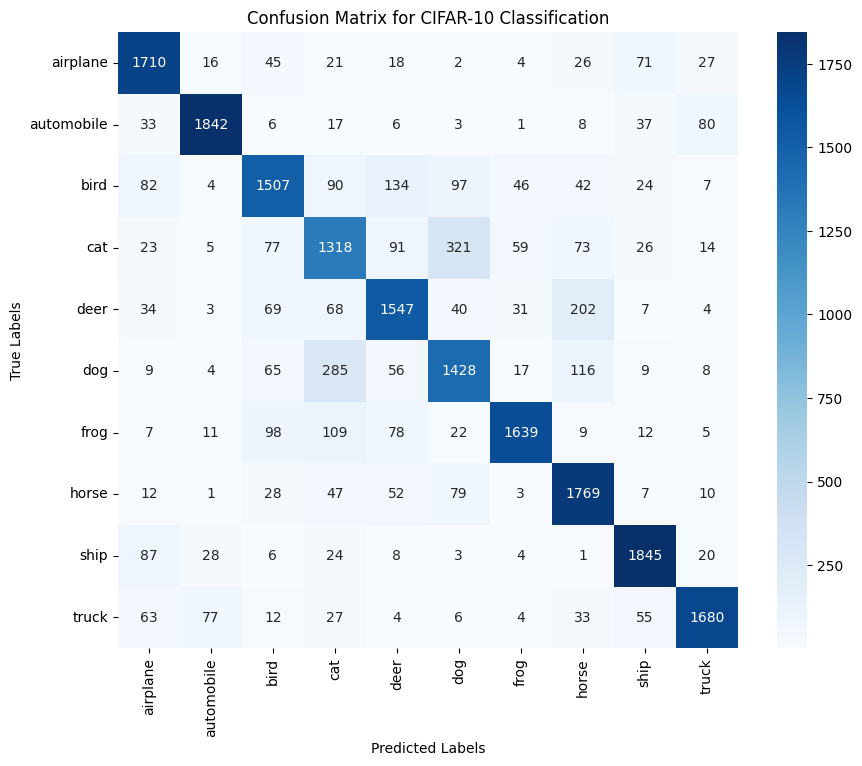

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict classes for the combined test set
predicted_classes = np.argmax(model.predict(combined_test_images), axis=1)
true_classes = np.argmax(combined_test_labels, axis=1)

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CIFAR-10 Classification')
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step


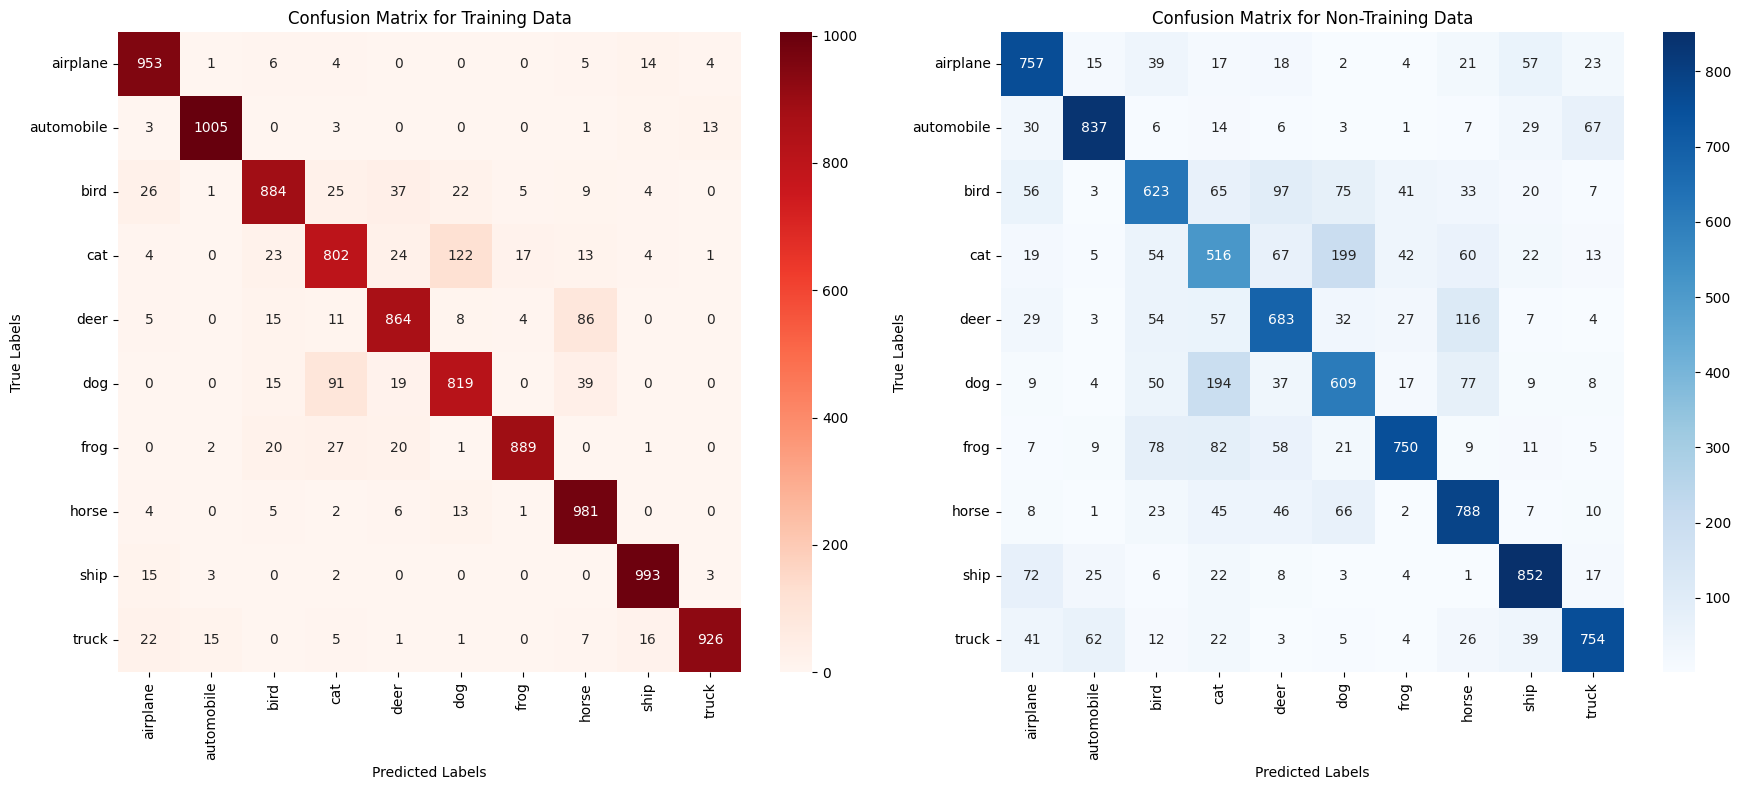

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict classes for the combined test set
predicted_classes = np.argmax(model.predict(combined_test_images), axis=1)
true_classes = np.argmax(combined_test_labels, axis=1)

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Separate predictions based on the membership flag
training_indices = membership_flag == 1
non_training_indices = membership_flag == 0

# Confusion matrix for images inside the training set
cm_training = confusion_matrix(true_classes[training_indices], predicted_classes[training_indices])

# Confusion matrix for images not in the training set
cm_non_training = confusion_matrix(true_classes[non_training_indices], predicted_classes[non_training_indices])

# Plot the confusion matrices side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Confusion matrix for training data
sns.heatmap(cm_training, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title('Confusion Matrix for Training Data')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Confusion matrix for non-training data
sns.heatmap(cm_non_training, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title('Confusion Matrix for Non-Training Data')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()
